In [274]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from random import random, uniform

from sklearn import preprocessing

%matplotlib inline

In [210]:
df=pd.read_csv("regLin.csv")

In [211]:
df.describe()

,X,y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


In [212]:
X_train,X_test,Y_train,Y_test=train_test_split(df[['X']],df['y'],train_size=0.75)

In [213]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)


In [214]:
scaleX=preprocessing.StandardScaler()
scaleX.fit(X_train)
X_train=scaleX.transform(X_train)
X_test=scaleX.transform(X_test)

Text(0,0.5,'y')

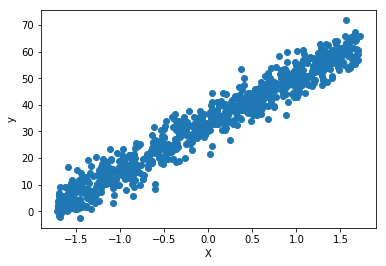

In [215]:
plt.scatter(X_train,Y_train)
plt.xlabel('X')
plt.ylabel('y')

# Enternar Modelo

In [225]:
linReg=LinearRegression()

In [226]:
linReg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [227]:
print linReg.intercept_, linReg.coef_

33.01333963613489 [17.58858323]


In [228]:
linReg.predict(np.asarray([[1.5]]))

array([59.39621448])

In [229]:
2.610258840062542 + 0.6071408*1.5

3.5209700400625423

In [230]:
np.mean((linReg.predict(X_test)-Y_test)**2)

16.14900679282948

# Visualizar

In [231]:
x=np.linspace(min(X_test),max(X_test),100)

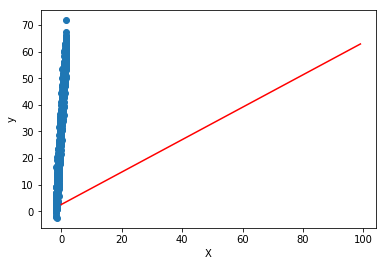

In [232]:
plt.scatter(X_train,Y_train)
plt.xlabel('X')
plt.ylabel('y')
plt.plot(x*linReg.coef_[0]+linReg.intercept_,color='red')

# Otros datos

In [50]:
df=pd.read_csv("regLin2.csv")
X_train,X_test,Y_train,Y_test=train_test_split(df[['X']],df['y'],train_size=0.75)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)


Text(0,0.5,'y')

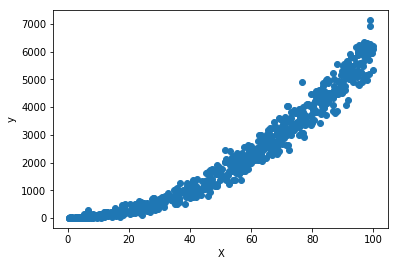

In [51]:
plt.scatter(X_train,Y_train)
plt.xlabel('X')
plt.ylabel('y')

In [61]:
linReg=LinearRegression()
linReg.fit(X_train+X_train**2,Y_train)
np.mean((linReg.predict(X_test+X_test**2)-Y_test)**2)

86336.50790287177

In [62]:
print linReg.intercept_, linReg.coef_

19.23460762210925 [0.60601121]


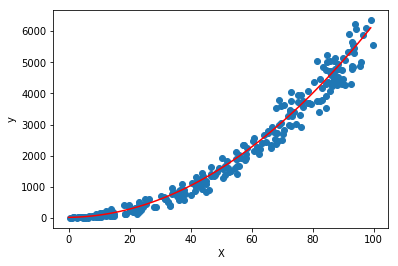

In [65]:
x=np.linspace(min(X_test),max(X_test),100)
plt.scatter(X_test,Y_test)
plt.xlabel('X')
plt.ylabel('y')
plt.plot((x+x**2)*linReg.coef_[0]+linReg.intercept_,color='red')

# Mas datos

Text(0,0.5,'y')

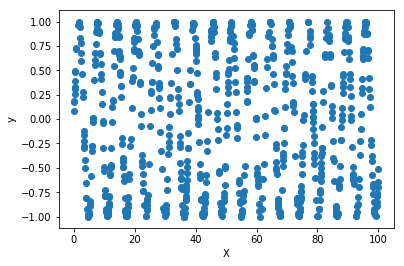

In [66]:
df=pd.read_csv("regLin3.csv")
X_train,X_test,Y_train,Y_test=train_test_split(df[['X']],df['y'],train_size=0.75)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)
plt.scatter(X_train,Y_train)
plt.xlabel('X')
plt.ylabel('y')

In [76]:
import math as mth
linReg=LinearRegression()
linReg.fit([[mth.sin(dato)] for dato in X_train],Y_train)
np.mean((linReg.predict([[mth.sin(dato)] for dato in X_test])-Y_test)**2)

3.808097100307387e-18

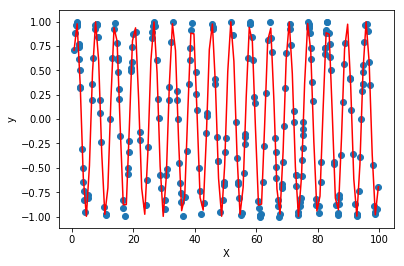

In [91]:
x=np.linspace(min(X_test),max(X_test),100)
plt.scatter(X_test,Y_test)
plt.xlabel('X')
plt.ylabel('y')
xtransf=[mth.sin(i)*linReg.coef_[0]+linReg.intercept_ for i in x]
plt.plot(x,xtransf,color='red')

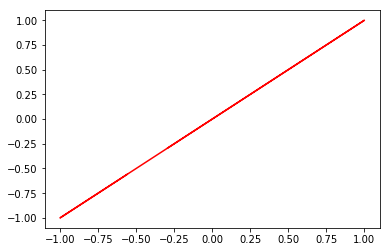

In [96]:
plt.plot(np.sin(X_train),linReg.predict(np.sin(X_train)),color='red')

# Iterativo

In [189]:
df=pd.read_csv("regLin.csv")
X_train,X_test,Y_train,Y_test=train_test_split(df[['X']],df['y'],train_size=0.75)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)


In [145]:
def salida(X,w):
    res=w[0]+X.dot(w[1:])
    return res

In [146]:
salida(np.asarray([2,3]),[1,1,1])

6

In [147]:
#for i in range(len(X)):
#    mi_modelo=salida(X[i],w)
#    error=y[i]-mi_modelo

In [201]:
def entrena(X,y,w,eta=0.1):
    for dato,valor in zip(X,y):
        mi_modelo=salida(dato,w)
        error=valor-mi_modelo
        w[0]=w[0]+eta*error
        for i in range(len(w)-1):
            w[i+1]=w[i+1]+eta*error*dato[i]    
    return w

In [208]:
w=[random() for i in range(1+len(X_train[0]))]
for i in range(50):
    w=entrena(X_train,Y_train,w)

In [179]:
w

[nan, nan]

In [190]:
from sklearn import preprocessing
scaleX=preprocessing.StandardScaler()
scaleX.fit(X_train)
X_train=scaleX.transform(X_train)
X_test=scaleX.transform(X_test)

In [206]:
w=[random() for i in range(1+len(X_train[0]))]
for i in range(50):
    w=entrena(X_train,Y_train,w,eta=1)

In [207]:
w

[35.72405115185264, 0.8798680635865166]

# El Perceptron

In [242]:
def salida(X,w):
    res=w[0]+X.dot(w[1:])
    if res >0:
        return 1
    else:
        return 0

In [243]:
def entrena(X,y,w,eta=0.1):
    for dato,valor in zip(X,y):
        mi_modelo=salida(dato,w)
        error=valor-mi_modelo
        w[0]=w[0]+eta*error
        for i in range(len(w)-1):
            w[i+1]=w[i+1]+eta*error*dato[i]    
    return w

In [319]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
y=[0,0,0,1]


In [245]:
w=[random() for i in range(1+len(X[0]))]
for i in range(50):
    w=entrena(X,y,w,eta=0.01)

In [246]:
w

[-0.10104637481550925, 0.08309483157846993, 0.06160376264078724]

In [251]:
salida(np.asarray([1.6,1]),w)

1

In [275]:
x1=[uniform(-5,5) for i in range(5000)]
x2=[uniform(-5,5) for i in range(5000)]

In [276]:
color=['red' if salida(np.asarray(dato),w) else 'blue' for dato in zip(x1,x2)]

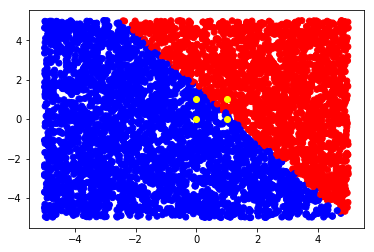

In [277]:
plt.scatter(x1,x2,c=color)
plt.scatter(X[:,0],X[:,1],c='yellow')

# Redes Neuronales

In [278]:
import numpy as np
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SigmoidLayer,TanhLayer



In [279]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[1],[-1],[-1],[1]])

In [295]:
net = buildNetwork(2, 2,1,outclass=TanhLayer)
ds = SupervisedDataSet(2, 1)
ds.setField('input', X)
ds.setField('target', Y)
trainer = BackpropTrainer(net, ds)
for i in range(5000):
    trainer.train()

In [296]:
net.activate([0,0])

array([0.72626065])

In [297]:
net.activate([0,1])

array([-0.72723371])

In [298]:
net.activate([1,0])

array([-0.70342666])

In [299]:
net.activate([1,1])

array([0.76635329])

In [345]:
x1=[uniform(-2,2) for i in range(100)]
x2=[uniform(-2,2) for i in range(100)]


In [346]:
y=np.asarray([[0] if np.sqrt(i**2+j**2)<=1 else [1] for i,j in zip(x1,x2)])

In [347]:
color=['red' if i ==0 else 'blue' for i in y]

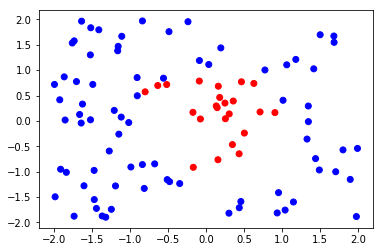

In [348]:
plt.scatter(x1,x2,c=color)

In [352]:
X=np.asarray(zip(x1,x2))
net = buildNetwork(2, 20,1,outclass=TanhLayer)
ds = SupervisedDataSet(2, 1)
ds.setField('input', X)
ds.setField('target', y)
trainer = BackpropTrainer(net, ds)
for i in range(50):
    trainer.train()

In [353]:
from sklearn.metrics import confusion_matrix
##Conjunto de prueba
x1=[uniform(-2,2) for i in range(1000)]
x2=[uniform(-2,2) for i in range(1000)]
X=np.asarray(zip(x1,x2))
y=np.asarray([[0] if np.sqrt(i**2+j**2)<=1 else [1] for i,j in zip(x1,x2)])
y_predict=[0 if net.activate(dato)<0.5 else 1 for dato in X ]
cm = confusion_matrix(y, y_predict)
print(cm)

[[148  38]
 [  0 814]]


In [332]:
len(X)

1000

In [338]:
len(y)

1000

# SVM

In [375]:
from sklearn.svm import SVC

In [367]:
x1=[uniform(-2,2) for i in range(1000)]
x2=[uniform(-2,2) for i in range(1000)]
X=np.asarray(zip(x1,x2))
y=np.asarray([[0] if np.sqrt(i**2+j**2)<=1 else [1] for i,j in zip(x1,x2)])

In [391]:
svm=SVC(C=1,kernel='rbf')

In [392]:
svm.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [393]:
y_predict=[svm.predict([dato])  for dato in X ]
cm = confusion_matrix(y, y_predict)
print(cm)

[[225   5]
 [  2 768]]


In [394]:
print len(svm.support_vectors_)

147
